# Table of content

1. Importing libraries

2. Importing data

3. Data security

4. Customer regional segmentation

5. Low revenue generating customers

6. Customer profiling

7. Descriptive statistics on customer profiles for usage frequency and expenditure

8. Customer profiles vs regions and departments

        8.1 Customer profiles vs regions
        8.2 Customer profiles vs departments

9. Exporting the dataframe

# 01. Importing Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [3]:
# Creating a shortcut path
path = path = r'D:\Instacart Basket Analysis'

In [4]:
path

'D:\\Instacart Basket Analysis'

In [5]:
# Importing instacart.pkl
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart.pkl'))

In [6]:
# Checking the first 5 rows of the df:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
# Dimensions of the dataframe
instacart.shape

(32404859, 33)

In [8]:
# Importing departments_wrangled.csv
deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [9]:
deps.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
deps.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [11]:
deps.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


# 03. Data Security

In the Instacart dataframe, there are personally identifiable information (PII), which should be removed before sharing the data with other stakeholders. Therefore, both "first_name" and "surname" column should be removed from the dataframe.

In [12]:
instacart_clean = instacart.drop(columns = ['first_name', 'surname'])

In [13]:
instacart_clean.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,median_order_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


# 04. Customer regional segmentation

### Creating a "Region" column

In [14]:
# Creating region lists:
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [15]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [16]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [17]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [18]:
# Creating a “Region” column based on the “State” column from the customers data set.
instacart_clean.loc[instacart_clean['state'].isin(Northeast), 'region'] = 'North East'

In [19]:
instacart_clean.loc[instacart_clean['state'].isin(Midwest), 'region'] = 'Midwest'

In [20]:
instacart_clean.loc[instacart_clean['state'].isin(South), 'region'] = 'South'

In [21]:
instacart_clean.loc[instacart_clean['state'].isin(West), 'region'] = 'West'

In [22]:
instacart_clean.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


### Spending habits by US regions

In [23]:
crosstab = pd.crosstab(instacart_clean['spending_flag'], instacart_clean['region'], dropna = False)

In [24]:
crosstab

region,Midwest,North East,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


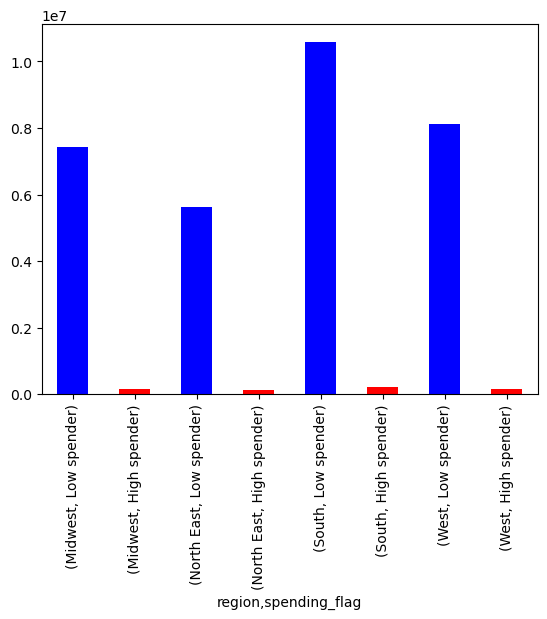

In [25]:
# Creating a bar chart
bar_region_spend = instacart_clean.groupby('region')['spending_flag'].value_counts().plot.bar(color=['blue', 'red'])

From the above table and bar chart, we can see that only about 2% of orders were placed by high spending customers. There is no particular difference between the regions in this case.

The highest number of orders were placed in South and the lowest in North East.

In [26]:
# Saving the chart as an image file:
bar_region_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spend.png'))

# 05. Low revenue generating customers

Creating an exclusion flag for low-activity customers (less then 5 orders) to exclude them from the dataframe, since the CFO is not interested in the customers who don't generate much revenue for the app.

In [27]:
# Creating a customer activity flag:
instacart_clean.loc[instacart_clean['max_order'] < 5, 'activity_flag'] = 'Low activity customer'

In [28]:
instacart_clean.loc[instacart_clean['max_order'] >= 5, 'activity_flag'] = 'High activity customer'

In [29]:
instacart_clean['activity_flag'].value_counts(dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: activity_flag, dtype: int64

In [30]:
instacart_clean.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer


In [31]:
# Creating a subset of high activity customers:
instacart_high = instacart_clean[instacart_clean['activity_flag'] == 'High activity customer']

In [32]:
instacart_high.shape

(30964564, 33)

The number of reconrds of the new dataframe containing only high activity customers (30'964'564) matches the previous check after applying the activity flag.

In [33]:
# Exporting the high activity customer dataframe as instacart_high_cust.pkl
instacart_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_high_cust.pkl'))

# 06. Customer profiling

## 6.1 Customers per age group

In [34]:
# Checking the details of the "age" column:
instacart_high['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

I will create the following age groups for the customers:

    - 18-26 - Gen Z
    - 27-42 - Millennials
    - 43-58 - Gen X
    - 59-77 - Boomers
    - 78-81 - Post War

I decided to perform the split by generation, because each of the generation have a different shopping behaviour, expect different lever of customer help, their brand loyalty is different and different marketing methods will appeal to them.

This split has been taken from the following website:
https://www.beresfordresearch.com/age-range-by-generation/ (accessed on 18.04.2023)

In [35]:
# Creating a customer age group flag:
instacart_high.loc[(instacart_high['age'] >= 18) & (instacart_high['age'] < 27), 'age_group'] = 'Gen Z (18-26)'

C:\Users\henri\AppData\Local\Temp\ipykernel_13820\1912993270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_high.loc[(instacart_high['age'] >= 18) & (instacart_high['age'] < 27), 'age_group'] = 'Gen Z (18-26)'


In [36]:
instacart_high.loc[(instacart_high['age'] >= 27) & (instacart_high['age'] < 43), 'age_group'] = 'Millennials (27-42)'

In [37]:
instacart_high.loc[(instacart_high['age'] >= 43) & (instacart_high['age'] < 59), 'age_group'] = 'Gen X (43-58)'

In [38]:
instacart_high.loc[(instacart_high['age'] >= 59) & (instacart_high['age'] < 78), 'age_group'] = 'Boomers (59-77)'

In [39]:
instacart_high.loc[(instacart_high['age'] >= 78) & (instacart_high['age'] <= 81), 'age_group'] = 'Post War (78-81)'

In [40]:
instacart_high['age_group'].value_counts(dropna = False)

Boomers (59-77)        9097166
Gen X (43-58)          7824562
Millennials (27-42)    7730373
Gen Z (18-26)          4354410
Post War (78-81)       1958053
Name: age_group, dtype: int64

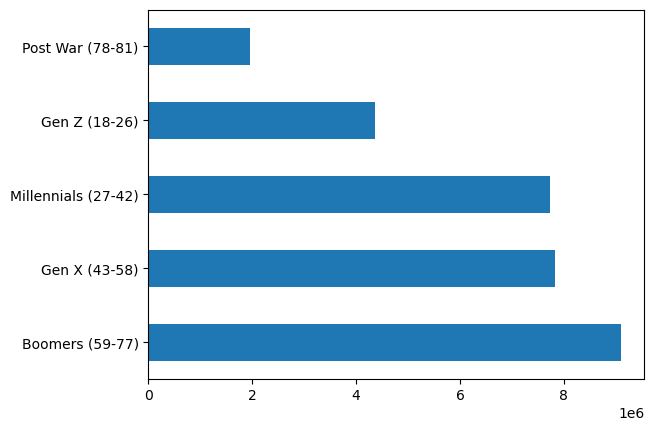

In [41]:
bar_age_group = instacart_high['age_group'].value_counts().plot.barh()

We see that the generation of Baby Boomers (aged 59-77 in 2023) has placed the most orders, followed by Gen X (aged 43-58 in 2023) and Millenials (aged 27-42 in 2023). Supprisingly, the youngest generation is not placing so many orders using the app, as the older adults and seniors. 

We need to keep in mind that the Post War generation consists of only customers aged 78-81, making this group quite small.

Reccomendation: Instacart marketing team should target their advertisment to the Gen Z customers, so that they place more orders using the app and to attract more of new customers.

In [42]:
# Saving the chart as an image file:
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

## 6.2 Customers by gender

The gender information is easily accessible directly in the dataframe, so no additional data aggregation is needed.

In [43]:
instacart_high['gender'].value_counts(dropna = False)

Male      15586740
Female    15377824
Name: gender, dtype: int64

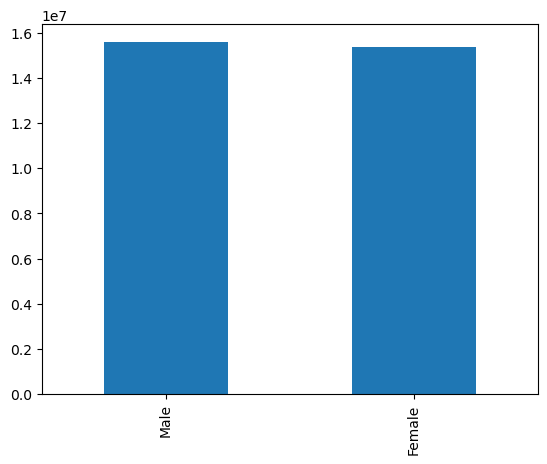

In [44]:
bar_gender = instacart_high['gender'].value_counts().plot.bar()

There is no difference in consumer behaviour in different number of placing the orders based on the gender. 

In [45]:
# Saving the chart as an image file:
bar_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_gender.png'))

## 6.3 Customers per income

In [46]:
# Checking the details of the "income" column:
instacart_high['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

I will group the customers into 3 income groups based on the article from usnews.com (link below) accessed on 18.04.2023:

    - Low income - less then 52'200
    - Middle income - 52'200 - 156'600
    - Upper income - more than 156'600
    
https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

In [47]:
# Creating a customer income group flag:
instacart_high.loc[instacart_high['income'] < 52200, 'income_group'] = 'Low income'

C:\Users\henri\AppData\Local\Temp\ipykernel_13820\753040209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_high.loc[instacart_high['income'] < 52200, 'income_group'] = 'Low income'


In [48]:
instacart_high.loc[(instacart_high['income'] >= 52200) & (instacart_high['income'] <= 156600), 'income_group'] = 'Middle income'

In [49]:
instacart_high.loc[instacart_high['income'] > 156600, 'income_group'] = 'Upper income'

In [50]:
instacart_high['income_group'].value_counts(dropna = False)

Middle income    24541393
Low income        3691708
Upper income      2731463
Name: income_group, dtype: int64

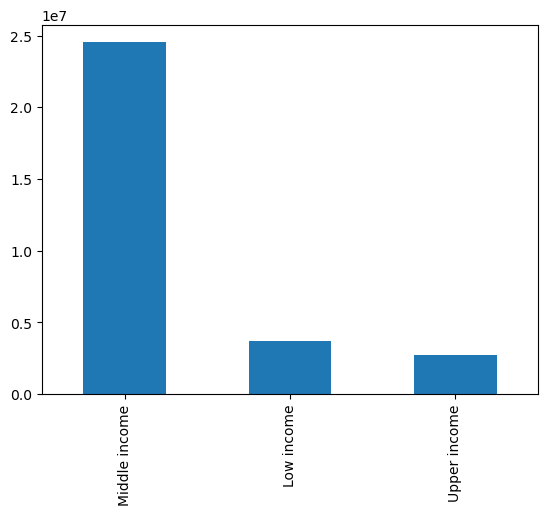

In [51]:
bar_income = instacart_high['income_group'].value_counts().plot.bar()

In [52]:
# Saving the chart as an image file:
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

## 6.4 Customers per family status

The family status information is easily accessible directly in the dataframe, so no additional data aggregation is needed.

In [53]:
instacart_high['family_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: family_status, dtype: int64

In [54]:
instacart_high['family_status'].value_counts(normalize = True)

married                             0.702213
single                              0.164524
divorced/widowed                    0.085429
living with parents and siblings    0.047834
Name: family_status, dtype: float64

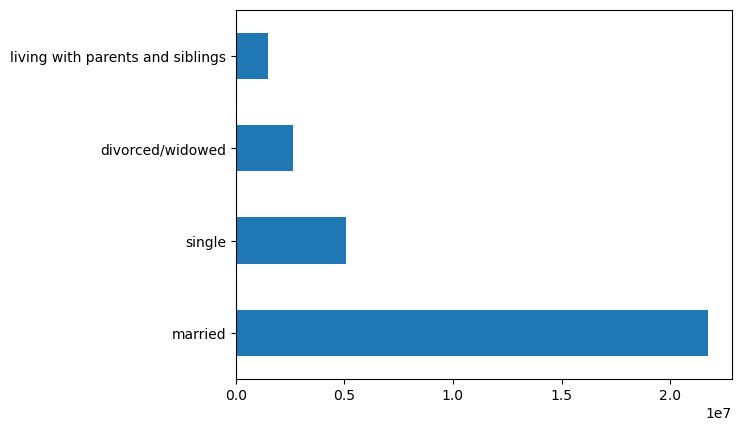

In [55]:
bar_family = instacart_high['family_status'].value_counts().plot.barh()

From the above, we see that the highest number of orders were placed by married customers (70.2% of orders), followed by single customers (16.5% of orders).

In [56]:
# Saving the chart as an image file:
bar_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family.png'))

## 6.5 Customers per number of children

The information about the number of children is easily accessible directly in the dataframe, so no additional data aggregation is needed.

In [57]:
instacart_high['number_of_dependants'].value_counts(dropna = False)

3    7772516
0    7739681
2    7733261
1    7719106
Name: number_of_dependants, dtype: int64

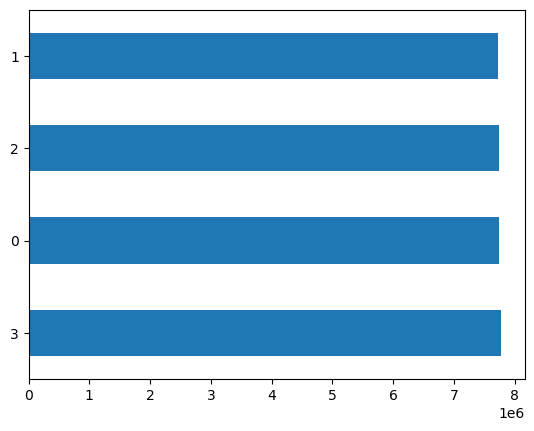

In [58]:
bar_children = instacart_high['number_of_dependants'].value_counts().plot.barh()

There is no difference in the number of orders placed by customers in relation to how many dependents they have.

In [59]:
# Saving the chart as an image file:
bar_children.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_children.png'))

## 6.6 Customer orders per time of day

In [60]:
instacart_high['order_hour_of_day'].value_counts(dropna=False)

10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: order_hour_of_day, dtype: int64

I will group the orders into 4 periods of day:

    - morning (6-11)
    - afternoon (12-17)
    - evening (18-23)
    - night (0-5)

In [61]:
# Creating period of day lists:
morning = [6, 7, 8, 9, 10, 11]

In [62]:
afternoon = [12, 13, 14, 15, 16, 17]

In [63]:
evening = [18, 19, 20, 21, 22, 23]

In [64]:
night = [0, 1, 2, 3, 4, 5]

In [65]:
# Creating a “order_time” column based on the "order_hour_of_day" column from the customers data set.
instacart_high.loc[instacart_high['order_hour_of_day'].isin(morning), 'order_time'] = 'Morning'

C:\Users\henri\AppData\Local\Temp\ipykernel_13820\1048982099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_high.loc[instacart_high['order_hour_of_day'].isin(morning), 'order_time'] = 'Morning'


In [66]:
instacart_high.loc[instacart_high['order_hour_of_day'].isin(afternoon), 'order_time'] = 'Afternoon'

In [67]:
instacart_high.loc[instacart_high['order_hour_of_day'].isin(evening), 'order_time'] = 'Evening'

In [68]:
instacart_high.loc[instacart_high['order_hour_of_day'].isin(night), 'order_time'] = 'Night'

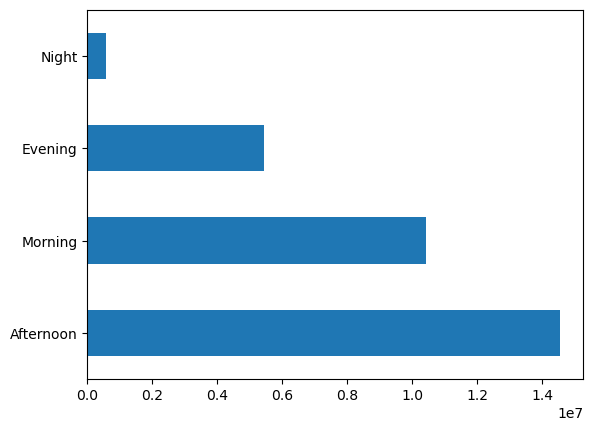

In [69]:
bar_time = instacart_high['order_time'].value_counts().plot.barh()

In [70]:
# Saving the chart as an image file:
bar_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_time.png'))

In [71]:
instacart_high['order_time'].value_counts(dropna = False)

Afternoon    14534966
Morning      10431571
Evening       5430696
Night          567331
Name: order_time, dtype: int64

In [72]:
instacart_high['order_time'].value_counts(normalize = True)

Afternoon    0.469406
Morning      0.336887
Evening      0.175384
Night        0.018322
Name: order_time, dtype: float64

Almost half of the orders (47%) is placed in the afternoon (between 12h and 18h), followed by orders placed during morning hours (between 6h and 12h) which account for 33.7%.

## 6.7 Customer orders per day of week

I will group the orders into:

    - weekdays (Mon-Fri)
    - weekends (Sat-Sun)

In [73]:
# Creating weekday lists:
weekday = [2, 3, 4, 5, 6]

In [74]:
weekend = [0, 1]

In [75]:
# Creating a “week_day” column based on the "order_day_of_week" column from the customers data set.
instacart_high.loc[instacart_high['orders_day_of_week'].isin(weekday), 'week_day'] = 'Weekday'

C:\Users\henri\AppData\Local\Temp\ipykernel_13820\2676908430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_high.loc[instacart_high['orders_day_of_week'].isin(weekday), 'week_day'] = 'Weekday'


In [76]:
instacart_high.loc[instacart_high['orders_day_of_week'].isin(weekend), 'week_day'] = 'Weekend'

In [77]:
instacart_high['week_day'].value_counts(dropna=False)

Weekday    19644268
Weekend    11320296
Name: week_day, dtype: int64

In [78]:
instacart_high['week_day'].value_counts(normalize=True)

Weekday    0.634411
Weekend    0.365589
Name: week_day, dtype: float64

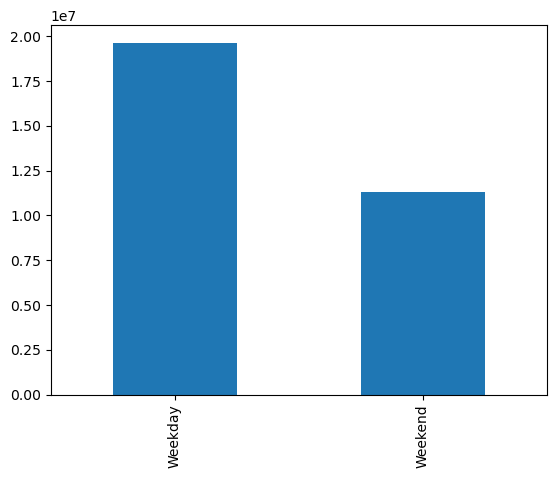

In [79]:
bar_day = instacart_high['week_day'].value_counts().plot.bar()

Majority of orders (63.4%) is placed during the week (from Monday to Friday), while the remaining orders (36.6%) are placed during weekend. 

When we calculate the average order per day, we get 3.9 milion orders during the week and 5.7 milion orders during the weekend. So even though in total numbers, the weekend orders seem smaller, in reality, more orders per day are placed actually during Saturday and Sunday.

In [80]:
# Saving the chart as an image file:
bar_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day.png'))

# 07. Descriptive statistics on customer profiles for usage frequency and expenditure

## 7.1 Age group

#### Usage frequency

In [81]:
instacart_high.groupby('age_group').agg({'median_order_frequency': ['max', 'mean', 'min']})

median_order_frequency               
                                       max      mean  min
age_group                                                
Boomers (59-77)                       30.0  9.952457  0.0
Gen X (43-58)                         30.0  9.979539  0.0
Gen Z (18-26)                         30.0  9.944671  0.0
Millennials (27-42)                   30.0  9.947727  0.0
Post War (78-81)                      30.0  9.954280  0.0

There is no significant difference in the frequency the customers place their orders based on the age group. All generations place an order on average every 10 days.

#### Expenditure

To have all the data for max, mean and min expenditure per customer profile, I will calculate the total spend by customer. This will add more insights, as average spend per customer per order might sometimes be not enough.

In [82]:
# Creating a "total_spend" by customer column:
instacart_high['total_spend'] = instacart_high.groupby(['user_id'])['prices'].transform(np.sum)

C:\Users\henri\AppData\Local\Temp\ipykernel_13820\712812461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_high['total_spend'] = instacart_high.groupby(['user_id'])['prices'].transform(np.sum)


In [83]:
instacart_high.groupby('age_group').agg({'mean_spend': ['max', 'mean', 'min']})

mean_spend                   
                              max       mean     min
age_group                                           
Boomers (59-77)       7414.485185  11.788628  1.2625
Gen X (43-58)        15006.940000  12.185918  1.0000
Gen Z (18-26)        10209.987755  12.161407  2.0000
Millennials (27-42)   6388.812766  11.859149  1.0000
Post War (78-81)     14042.512281  11.384939  2.0000

In [84]:
instacart_high.groupby('age_group').agg({'total_spend': ['max', 'mean', 'min']})

total_spend                   
                            max         mean   min
age_group                                         
Boomers (59-77)         26394.9  3411.315497   6.8
Gen X (43-58)           21509.2  3400.744635   5.0
Gen Z (18-26)           18436.9  3427.819401  10.5
Millennials (27-42)     22696.9  3446.325156   7.0
Post War (78-81)        18949.4  3389.577509  12.0

The average total spend and spend per order by different age groups is quite similar. The bigest difference per age group we see on the maximums. The maximum average order for Gen X (43-58) customers is USD 15'006, which might indicate that this age group places bigger orders. On the other hand, the lowest maximum average spend for an order is for Millennials (27-42) and is equal to USD 6'388. This might indicate that either they place smaller (or less expensive) orders, or they do more in-store shopping.

We can see slightly different behaviour in the total spend by customers. The highest total spend by a customer is from the Boomers group (59-77), which might indicate that even they do not spend as much per order (max average spend per order in USD 7'414), in total they place high amount of orders (which we already observed in point 6.1), which sums up to a high maximum total spend.

## 7.2 Gender

#### Usage frequency

In [85]:
instacart_high.groupby('gender').agg({'median_order_frequency': ['max', 'mean', 'min']})

median_order_frequency               
                          max      mean  min
gender                                      
Female                   30.0  9.938001  0.0
Male                     30.0  9.976022  0.0

There is no significant difference between female and male placing the orders, they both order on average every 10 days, with women placing orders slightly more frequent.

#### Expenditure

In [86]:
instacart_high.groupby('gender').agg({'mean_spend': ['max', 'mean', 'min']})

mean_spend                   
                 max       mean     min
gender                                 
Female  14042.512281  11.837867  1.2625
Male    15006.940000  12.027894  1.0000

In [87]:
instacart_high.groupby('gender').agg({'total_spend': ['max', 'mean', 'min']})

total_spend                   
               max         mean   min
gender                               
Female     26394.9  3441.120215  10.1
Male       24307.1  3395.846853   5.0

On average women tend to place less expensive orders than men, however in total women spend more than men. We might assume that women tend to place the orders more frequently, which we can see in the first table of this point. 

## 7.3 Income

#### Usage frequency

In [88]:
instacart_high.groupby('income_group').agg({'median_order_frequency': ['max', 'mean', 'min']})

median_order_frequency                
                                 max       mean  min
income_group                                        
Low income                      30.0  10.478381  0.0
Middle income                   30.0   9.900255  0.0
Upper income                    30.0   9.763752  0.0

We can see a correlation between the income and order frequency: the lower the income, the less frequent are the orders on average.

#### Expenditure

In [89]:
instacart_high.groupby('income_group').agg({'mean_spend': ['max', 'mean', 'min']})

mean_spend                
                        max       mean  min
income_group                               
Low income        13.878571   6.766241  1.0
Middle income  14042.512281   9.601506  1.3
Upper income   15006.940000  39.869828  7.0

In [90]:
instacart_high.groupby('income_group').agg({'total_spend': ['max', 'mean', 'min']})

total_spend                   
                      max         mean   min
income_group                                
Low income        24307.1  2582.847927   5.0
Middle income     26394.9  3530.239771  11.2
Upper income      17435.6  3542.058250  39.5

Similar correlation, but in the opposite direction can be observed in the spend by income group: average spend by order is low for the low income customers (6.77) and middle income (9.60), but quite high for the upper income group (39.87). The same is valid for the average total spend by customer: the lowest is for low income group (2'582.85), the highest are for the middle income (3'530.24) and upper income (3'542.06). The high average total spend by customer might be explained by a high total number of orders placed by the middle income group, which can be seen in the point 6.3.

## 7.4 Family status

#### Usage frequency

In [91]:
instacart_high.groupby('family_status').agg({'median_order_frequency': ['max', 'mean', 'min']})

median_order_frequency               
                                                    max      mean  min
family_status                                                         
divorced/widowed                                   30.0  9.874549  0.0
living with parents and siblings                   30.0  9.869971  0.0
married                                            30.0  9.970400  0.0
single                                             30.0  9.968773  0.0

Customers living with partents and siblings (we can assume they are young adults) place the orders most frequently (every 9.87 days). The orders placed by customers with other family status are less frequent, but still on avarage every 10 days.

#### Expenditure

In [92]:
instacart_high.groupby('family_status').agg({'mean_spend': ['max', 'mean', 'min']})

mean_spend                     
                                           max       mean       min
family_status                                                      
divorced/widowed                  14042.512281  11.532741  1.308333
living with parents and siblings  10209.987755  10.890167  2.133333
married                            7414.485185  11.944390  1.000000
single                            15006.940000  12.398586  1.000000

In [93]:
instacart_high.groupby('family_status').agg({'total_spend': ['max', 'mean', 'min']})

total_spend                   
                                         max         mean   min
family_status                                                  
divorced/widowed                     24307.1  3461.330920  15.7
living with parents and siblings     16048.1  3459.618715  14.4
married                              26394.9  3412.050028   6.8
single                               20315.1  3410.806081   5.0

There is no significant difference between the customers with different family status in terms of average total spend per customer (there is a slight difference in average spend by order: from 10.89 for living with parents and siblings to 12.40 for single adults). The maximum total spend is the lowest for living with parents and siblings (16'048) and highest for married customers (26'395). All of this proves that the young adults who are still living with parents or siblings spend less per order and in total, since they are probably not the main person purchasing for the houshold. On the other hand, married customers spend the most in total for all the orders, while single people place more expensive orders on average.

## 7.5 Number of children

#### Usage frequency

In [94]:
instacart_high.groupby('number_of_dependants').agg({'median_order_frequency': ['max', 'mean', 'min']})

median_order_frequency               
                                        max      mean  min
number_of_dependants                                      
0                                      30.0  9.936569  0.0
1                                      30.0  9.970035  0.0
2                                      30.0  9.972207  0.0
3                                      30.0  9.949826  0.0

There is no significant difference in the frequency the orders are placed by customers with or without children. The number of children doesn't have impact on the frequency either.

#### Expenditure

In [95]:
instacart_high.groupby('number_of_dependants').agg({'mean_spend': ['max', 'mean', 'min']})

mean_spend                   
                               max       mean     min
number_of_dependants                                 
0                     15006.940000  12.102657  1.0000
1                      6983.593023  11.555234  1.3000
2                      6389.512766  12.284472  1.0000
3                     10209.987755  11.791609  1.2625

In [96]:
instacart_high.groupby('number_of_dependants').agg({'total_spend': ['max', 'mean', 'min']})

total_spend                   
                             max         mean   min
number_of_dependants                               
0                        24307.1  3428.074479   5.0
1                        22696.9  3436.521743   6.8
2                        26394.9  3387.963957   7.0
3                        21509.2  3420.775841  10.1

The average total spend and average spend by order are not influenced by the number of children of the customers.

## 7.6 Orders per time of day

#### Usage frequency

In [97]:
instacart_high.groupby('order_time').agg({'median_order_frequency': ['max', 'mean', 'min']})

median_order_frequency                
                              max       mean  min
order_time                                       
Afternoon                    30.0  10.196369  0.0
Evening                      30.0  10.158006  0.0
Morning                      30.0   9.500778  0.0
Night                        30.0  10.296523  0.0

We can see that the customers who place their orders in the morning (6:00-11:59) place them most frequently (on average every 9.5 days). Customers placing their orders between 12:00(noon) and 5:59 tend to place their orders less frequently (on average between every 10.2 and 10.3 days)

#### Expenditure

In [98]:
instacart_high.groupby('order_time').agg({'mean_spend': ['max', 'mean', 'min']})

mean_spend                
                     max       mean  min
order_time                              
Afternoon   15006.940000  12.108784  1.0
Evening     15006.940000  11.459467  1.0
Morning     15006.940000  11.938239  1.0
Night        6390.138298  11.894366  1.3

In [99]:
instacart_high.groupby('order_time').agg({'total_spend': ['max', 'mean', 'min']})

total_spend                   
                   max         mean   min
order_time                               
Afternoon      26394.9  3316.687194   5.0
Evening        26394.9  3312.014555   5.0
Morning        26394.9  3632.185211   6.8
Night          26394.9  3107.965747  13.0

There is not much of a difference of average spend per order not average total spend by customers in term of the time the order is placed. We can observe an interesting thing: we see that the same customer who on average has a max order of 15'006 has placed their orders between (6:00 and 23:59), and also the same customer who has a total spend of 26'395 placed the orders in different times during the day and night.

## 7.7 Orders per day of week

#### Usage frequency

In [100]:
instacart_high.groupby('week_day').agg({'median_order_frequency': ['max', 'mean', 'min']})

median_order_frequency                
                            max       mean  min
week_day                                       
Weekday                    30.0   9.833177  0.0
Weekend                    30.0  10.172253  0.0

Customers who place their orders during the weekday tend to place their orders more frequently: on average every 9.8 days vs every 10.2 days on average when they are placed during the weekend.

#### Expenditure

In [101]:
instacart_high.groupby('week_day').agg({'mean_spend': ['max', 'mean', 'min']})

mean_spend                
                max       mean  min
week_day                           
Weekday    15006.94  12.170708  1.0
Weekend    15006.94  11.521927  1.0

In [102]:
instacart_high.groupby('week_day').agg({'total_spend': ['max', 'mean', 'min']})

total_spend                  
                 max         mean  min
week_day                              
Weekday      26394.9  3422.230733  5.0
Weekend      26394.9  3411.563208  5.0

We see a slight difference between the average spend per order place on weekday (12.17) vs on weekend (11.52). The total spend by customer is very similar and does not depend on the day of the week.

We can see a similarity to observation done in point 7.6. The customer who placed the highest average order and the customer who has the highest total spend have placed their orders on both weekdays and weekends.

## 7.8 Customer loyalty

#### Usage frequency

In [103]:
instacart_high.groupby('loyalty_flag').agg({'median_order_frequency': ['max', 'mean', 'min']})

median_order_frequency                
                                    max       mean  min
loyalty_flag                                           
Loyal customer                     14.0   5.170559  0.0
New customer                       30.0  18.037059  0.0
Regular customer                   30.0  10.612951  0.0

#### Expenditure

In [186]:
instacart_high.groupby('loyalty_flag').agg({'mean_spend': ['max', 'mean', 'min']})

mean_spend                     
                           max       mean       min
loyalty_flag                                       
Loyal customer     8794.882427  10.386336  2.387671
New customer      15006.940000  13.387725  1.000000
Regular customer   4506.269204  12.495717  1.308333

In [187]:
instacart_high.groupby('loyalty_flag').agg({'total_spend': ['max', 'mean', 'min']})

total_spend                    
                         max         mean    min
loyalty_flag                                    
Loyal customer       26394.9  6153.840807  156.0
New customer          3920.4   785.446264    5.0
Regular customer     12186.6  2443.027952   15.7

In [189]:
instacart_high['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

In [190]:
instacart_high['loyalty_flag'].value_counts(dropna = False, normalize = True)

Regular customer    0.512740
Loyal customer      0.332125
New customer        0.155135
Name: loyalty_flag, dtype: float64

# 08. Customer profiles vs regions and departments

## 8.1 Customer profiles vs regions

#### Age

In [104]:
crosstab_age_region = pd.crosstab(instacart_high['age_group'], instacart_high['region'], dropna = False)

In [105]:
crosstab_age_region

region,Midwest,North East,South,West
age_group,,,,
Boomers (59-77),2112556,1631005,3013242,2340363
Gen X (43-58),1870948,1380454,2548678,2024482
Gen Z (18-26),1003754,763847,1489920,1096889
Millennials (27-42),1818698,1343954,2599552,1968169
Post War (78-81),455557,345425,659747,497324


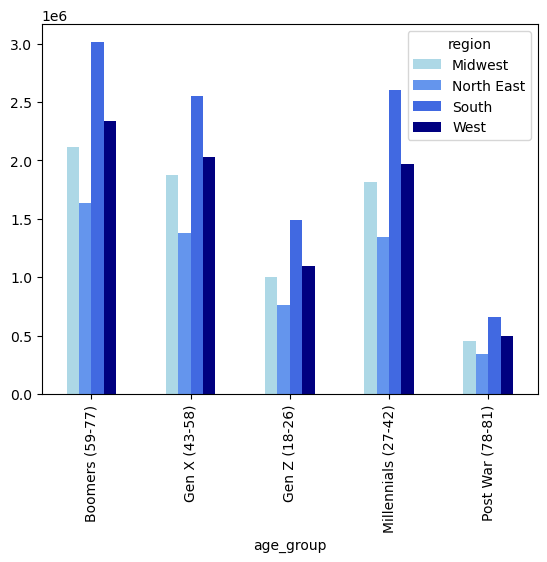

In [106]:
bar_age_region = crosstab_age_region.plot.bar(color = ['lightblue','cornflowerblue', 'royalblue', 'navy'])

In [107]:
# Saving the chart as an image file:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

#### Gender

In [108]:
crosstab_gender_region = pd.crosstab(instacart_high['gender'], instacart_high['region'], dropna = False)

In [109]:
crosstab_gender_region

region,Midwest,North East,South,West
gender,,,,
Female,3637482,2639666,5137028,3963648
Male,3624031,2825019,5174111,3963579


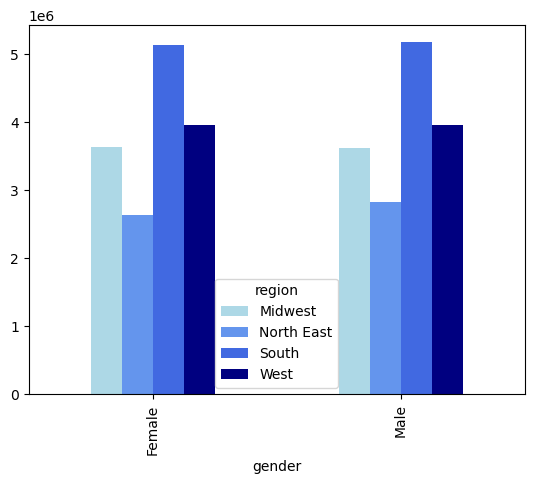

In [110]:
bar_gender_region = crosstab_gender_region.plot.bar(color = ['lightblue','cornflowerblue', 'royalblue', 'navy'])

In [111]:
# Saving the chart as an image file:
bar_gender_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_gender_region.png'))

#### Income

In [112]:
crosstab_income_region = pd.crosstab(instacart_high['income_group'], instacart_high['region'], dropna = False)

In [113]:
crosstab_income_region

region,Midwest,North East,South,West
income_group,,,,
Low income,864462,648484,1257064,921698
Middle income,5761821,4340366,8134024,6305182
Upper income,635230,475835,920051,700347


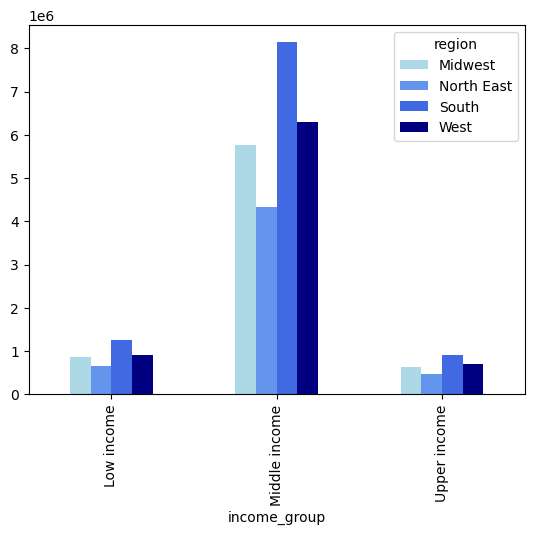

In [114]:
bar_income_region = crosstab_income_region.plot.bar(color = ['lightblue','cornflowerblue', 'royalblue', 'navy'])

In [115]:
# Saving the chart as an image file:
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))

#### Family status

In [116]:
crosstab_family_region = pd.crosstab(instacart_high['family_status'], instacart_high['region'], dropna = False)

In [117]:
crosstab_family_region

region,Midwest,North East,South,West
family_status,,,,
divorced/widowed,617198,478767,877314,671992
living with parents and siblings,351435,256430,505457,367850
married,5087262,3853773,7223749,5578927
single,1205618,875715,1704619,1308458


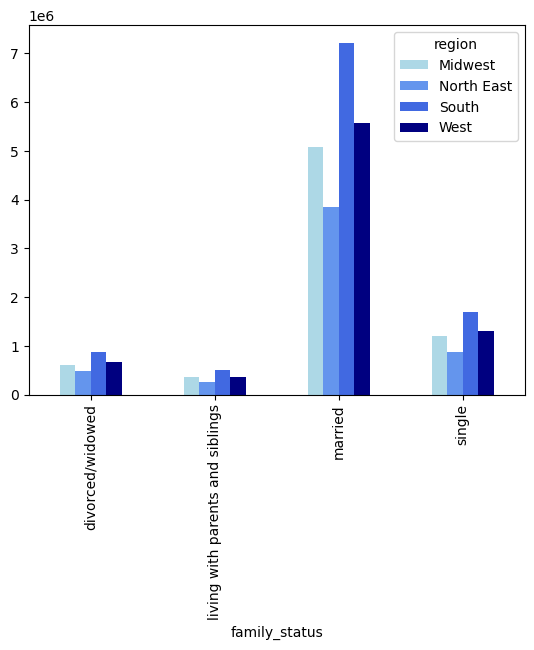

In [118]:
bar_family_region = crosstab_family_region.plot.bar(color = ['lightblue','cornflowerblue', 'royalblue', 'navy'])

In [119]:
# Saving the chart as an image file:
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_region.png'))

#### Number of children

In [120]:
crosstab_children_region = pd.crosstab(instacart_high['number_of_dependants'], instacart_high['region'], dropna = False)

In [121]:
crosstab_children_region

region,Midwest,North East,South,West
number_of_dependants,,,,
0,1822816,1354482,2581933,1980450
1,1841417,1377009,2539625,1961055
2,1809994,1351961,2603717,1967589
3,1787286,1381233,2585864,2018133


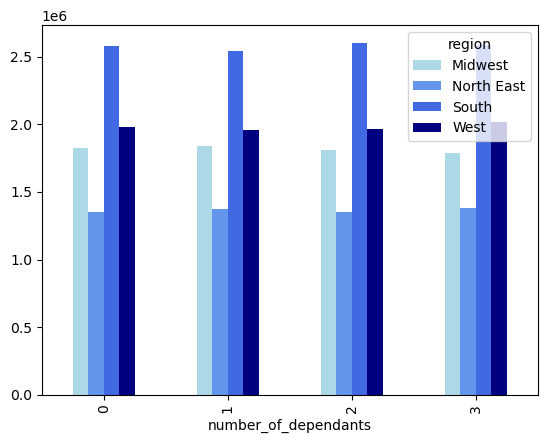

In [122]:
bar_children_region = crosstab_children_region.plot.bar(color = ['lightblue','cornflowerblue', 'royalblue', 'navy'])

In [123]:
# Saving the chart as an image file:
bar_children_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_children_region.png'))

#### Orders by time of day

In [124]:
crosstab_time_region = pd.crosstab(instacart_high['order_time'], instacart_high['region'], dropna = False)

In [125]:
crosstab_time_region

region,Midwest,North East,South,West
order_time,,,,
Afternoon,3404066,2568358,4820769,3741773
Evening,1284980,957797,1811980,1375939
Morning,2439886,1836940,3488880,2665865
Night,132581,101590,189510,143650


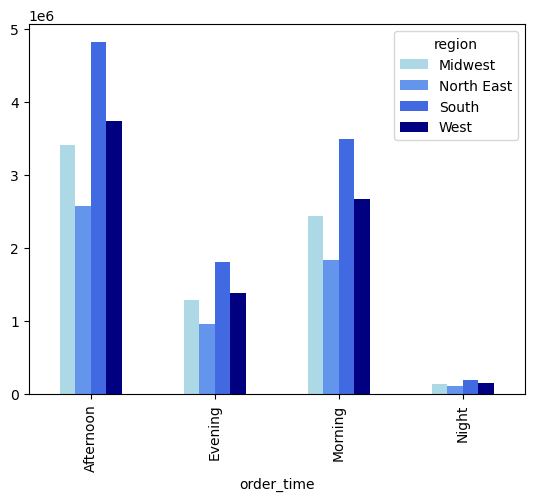

In [126]:
bar_time_region = crosstab_time_region.plot.bar(color = ['lightblue','cornflowerblue', 'royalblue', 'navy'])

In [127]:
# Saving the chart as an image file:
bar_time_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_time_region.png'))

#### Orders by week day

In [128]:
crosstab_week_day_region = pd.crosstab(instacart_high['week_day'], instacart_high['region'], dropna = False)

In [129]:
crosstab_week_day_region

region,Midwest,North East,South,West
week_day,,,,
Weekday,4607669,3466655,6547439,5022505
Weekend,2653844,1998030,3763700,2904722


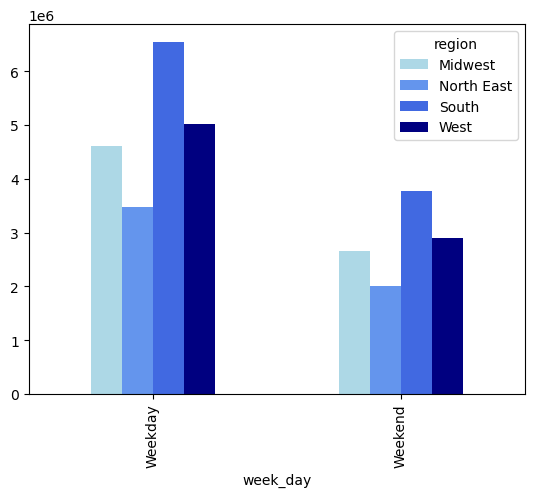

In [130]:
bar_day_region = crosstab_week_day_region.plot.bar(color = ['lightblue','cornflowerblue', 'royalblue', 'navy'])

In [131]:
# Saving the chart as an image file:
bar_day_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day_region.png'))

## 8.2 Customer profiles vs departments

#### Applying department name to the instacart dataframe

In [132]:
deps

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [133]:
# Creating flags for the department name
instacart_high.loc[instacart_high['department_id'] == 1, 'department'] = 'frozen'

C:\Users\henri\AppData\Local\Temp\ipykernel_13820\233607382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_high.loc[instacart_high['department_id'] == 1, 'department'] = 'frozen'


In [134]:
instacart_high.loc[instacart_high['department_id'] == 2, 'department'] = 'other'

In [135]:
instacart_high.loc[instacart_high['department_id'] == 3, 'department'] = 'bakery'

In [136]:
instacart_high.loc[instacart_high['department_id'] == 4, 'department'] = 'produce'

In [137]:
instacart_high.loc[instacart_high['department_id'] == 5, 'department'] = 'alcohol'

In [138]:
instacart_high.loc[instacart_high['department_id'] == 6, 'department'] = 'international'

In [139]:
instacart_high.loc[instacart_high['department_id'] == 7, 'department'] = 'beverages'

In [140]:
instacart_high.loc[instacart_high['department_id'] == 8, 'department'] = 'pets'

In [141]:
instacart_high.loc[instacart_high['department_id'] == 9, 'department'] = 'dry goods pasta'

In [142]:
instacart_high.loc[instacart_high['department_id'] == 10, 'department'] = 'bulk'

In [143]:
instacart_high.loc[instacart_high['department_id'] == 11, 'department'] = 'personal care'

In [144]:
instacart_high.loc[instacart_high['department_id'] == 12, 'department'] = 'meat seafood'

In [145]:
instacart_high.loc[instacart_high['department_id'] == 13, 'department'] = 'pantry'

In [146]:
instacart_high.loc[instacart_high['department_id'] == 14, 'department'] = 'breakfast'

In [147]:
instacart_high.loc[instacart_high['department_id'] == 15, 'department'] = 'canned goods'

In [148]:
instacart_high.loc[instacart_high['department_id'] == 16, 'department'] = 'dairy eggs'

In [149]:
instacart_high.loc[instacart_high['department_id'] == 17, 'department'] = 'houshold'

In [150]:
instacart_high.loc[instacart_high['department_id'] == 18, 'department'] = 'babies'

In [151]:
instacart_high.loc[instacart_high['department_id'] == 19, 'department'] = 'snacks'

In [152]:
instacart_high.loc[instacart_high['department_id'] == 20, 'department'] = 'deli'

In [153]:
instacart_high.loc[instacart_high['department_id'] == 21, 'department'] = 'missing'

In [154]:
instacart_high['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
houshold            699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

#### Age

In [155]:
crosstab_age_department = pd.crosstab(instacart_high['department'], instacart_high['age_group'], dropna = False)

In [156]:
crosstab_age_department

age_group,Boomers (59-77),Gen X (43-58),Gen Z (18-26),Millennials (27-42),Post War (78-81)
department,,,,,
alcohol,41724,36640,21691,36091,8481
babies,119302,105821,58819,101443,25007
bakery,328906,284382,157905,279078,70557
beverages,763038,653470,358982,634092,162319
breakfast,195344,170650,95999,166643,42214
bulk,9656,8387,4831,8345,2232
canned goods,296173,255469,142815,253524,64093
dairy eggs,1520143,1303151,731462,1299316,323110
deli,296379,251948,141042,251512,62953


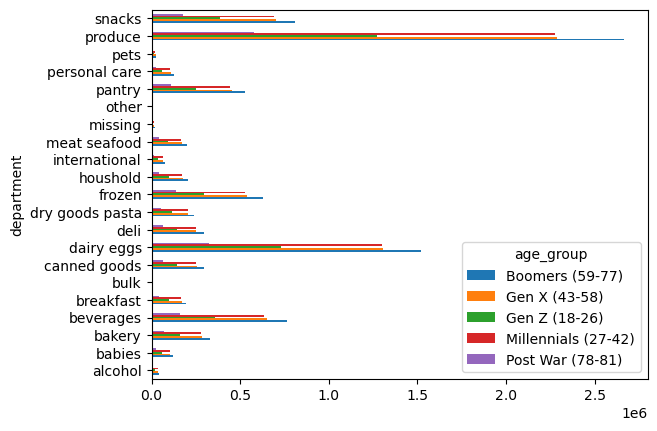

In [157]:
bar_age_dept = crosstab_age_department.plot.barh()

We see that the produce and dairy/eggs departments are the two most popular ones, especially among the Baby Boomers, Gen X and Millennials generations.

In [158]:
# Saving the chart as an image file:
bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dept.png'))

#### Gender

In [159]:
crosstab_dept_gender = pd.crosstab(instacart_high['department'], instacart_high['gender'], dropna = False)

In [160]:
crosstab_dept_gender

gender,Female,Male
department,,
alcohol,74844,69783
babies,200641,209751
bakery,559143,561685
beverages,1280384,1291517
breakfast,334473,336377
bulk,16742,16709
canned goods,498501,513573
dairy eggs,2574661,2602521
deli,499243,504591


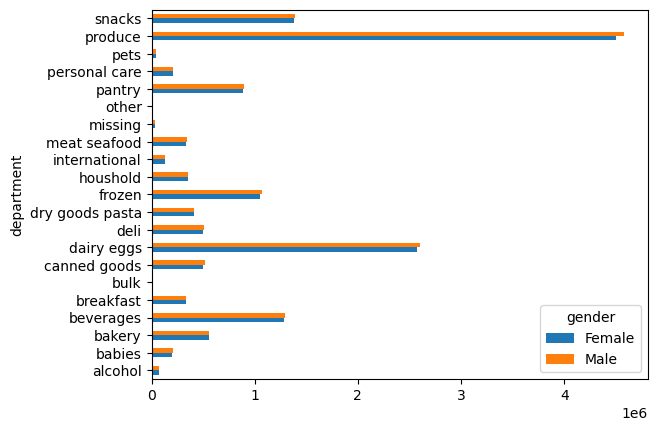

In [161]:
bar_dept_gender = crosstab_dept_gender.plot.barh()

In [162]:
# Saving the chart as an image file:
bar_dept_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_gender.png'))

#### Income

In [163]:
crosstab_dept_income = pd.crosstab(instacart_high['department'], instacart_high['income_group'], dropna = False)

In [164]:
crosstab_dept_income

income_group,Low income,Middle income,Upper income
department,,,
alcohol,19346,106810,18471
babies,34026,339345,37021
bakery,118157,896199,106472
beverages,413096,1936487,222318
breakfast,99160,514064,57626
bulk,5060,25988,2403
canned goods,88560,829791,93723
dairy eggs,555091,4159097,462994
deli,116835,798206,88793


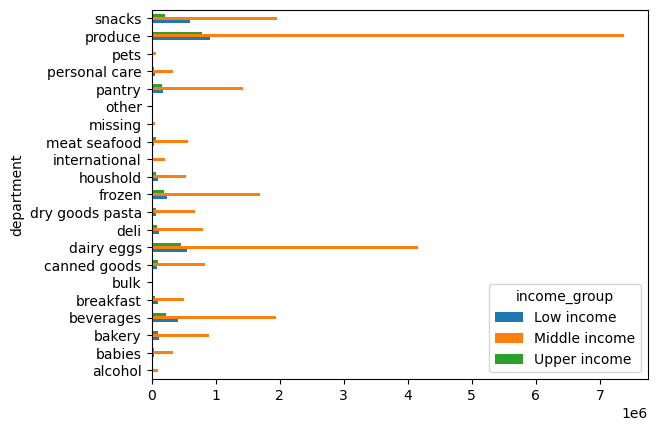

In [165]:
bar_dept_income = crosstab_dept_income.plot.barh()

In [166]:
# Saving the chart as an image file:
bar_dept_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_income.png'))

#### Family status

In [167]:
crosstab_dept_family = pd.crosstab(instacart_high['department'], instacart_high['family_status'], dropna = False)

In [168]:
crosstab_dept_family

family_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11859,8379,99421,24968
babies,34351,19381,287683,68977
bakery,95735,53684,785749,185660
beverages,220879,119107,1807453,424462
breakfast,56590,33198,471220,109842
bulk,2676,1633,23818,5324
canned goods,84268,48477,712577,166752
dairy eggs,442602,250207,3632599,851774
deli,86749,48119,702333,166633


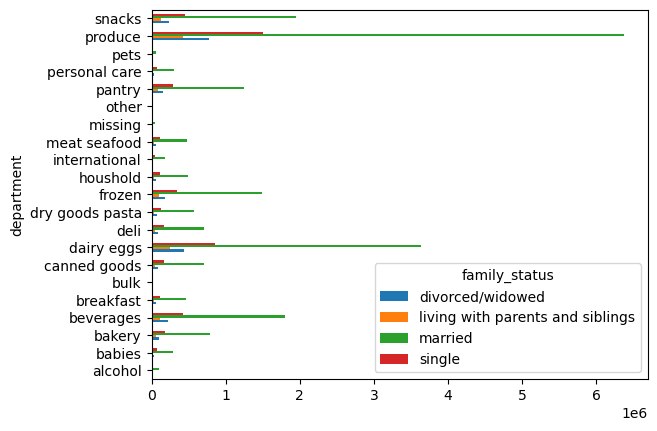

In [169]:
bar_dept_family = crosstab_dept_family.plot.barh()

In [170]:
# Saving the chart as an image file:
bar_dept_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_family.png'))

#### Number of children

In [171]:
crosstab_dept_children = pd.crosstab(instacart_high['department'], instacart_high['number_of_dependants'], dropna = False)

In [172]:
crosstab_dept_children

number_of_dependants,0,1,2,3
department,,,,
alcohol,36827,35799,34668,37333
babies,103328,99905,104574,102585
bakery,281395,280390,279221,279822
beverages,645341,638747,646886,640927
breakfast,166432,169242,167854,167322
bulk,8000,8573,8475,8403
canned goods,251020,253013,252716,255325
dairy eggs,1294376,1297659,1288883,1296264
deli,253382,247893,249967,252592


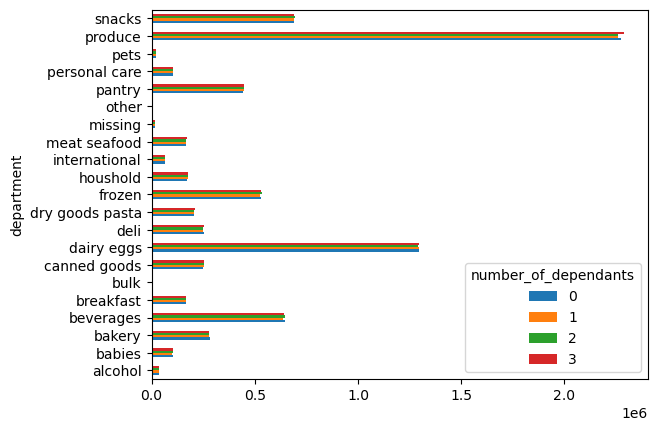

In [173]:
bar_dept_children = crosstab_dept_children.plot.barh()

In [174]:
# Saving the chart as an image file:
bar_dept_children.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_children.png'))

#### Orders by time of day

In [175]:
crosstab_dept_time = pd.crosstab(instacart_high['department'], instacart_high['order_time'], dropna = False)

In [176]:
crosstab_dept_time

order_time,Afternoon,Evening,Morning,Night
department,,,,
alcohol,78928,20826,43257,1616
babies,178926,78755,146626,6085
bakery,532290,191037,378160,19341
beverages,1201018,427315,895348,48220
breakfast,302724,117432,239163,11531
bulk,15306,6090,11474,581
canned goods,488131,173481,331655,18807
dairy eggs,2384347,902200,1801298,89337
deli,480356,175379,330132,17967


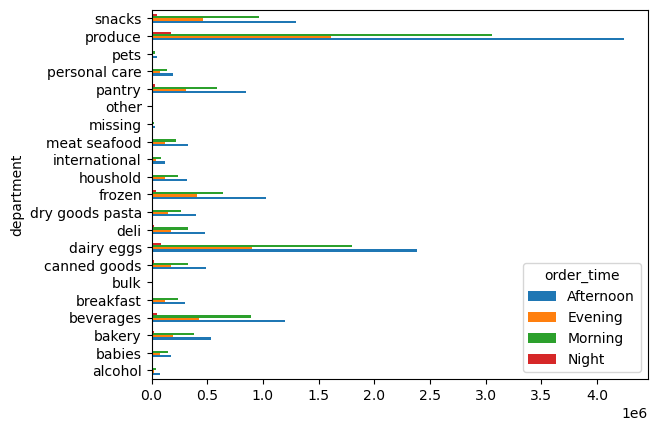

In [177]:
bar_dept_time = crosstab_dept_time.plot.barh()

In [178]:
# Saving the chart as an image file:
bar_dept_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_time.png'))

#### Orders by week day

In [179]:
crosstab_dept_day = pd.crosstab(instacart_high['department'], instacart_high['week_day'], dropna = False)

In [180]:
crosstab_dept_day

week_day,Weekday,Weekend
department,,
alcohol,109051,35576
babies,260774,149618
bakery,711743,409085
beverages,1696857,875044
breakfast,428751,242099
bulk,21393,12058
canned goods,625838,386236
dairy eggs,3289485,1887697
deli,627795,376039


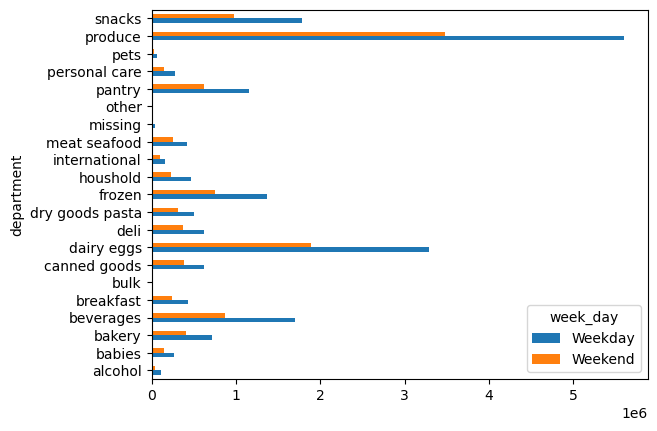

In [181]:
bar_dept_day = crosstab_dept_day.plot.barh()

In [182]:
# Saving the chart as an image file:
bar_dept_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_day.png'))

# 09. Exporting the dataframe

In [183]:
# Checking first 5 rows of the df:
instacart_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,income,_merge,region,activity_flag,age_group,income_group,order_time,week_day,total_spend,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,both,South,High activity customer,Millennials (27-42),Low income,Morning,Weekday,375.7,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,both,South,High activity customer,Millennials (27-42),Low income,Morning,Weekday,375.7,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,both,South,High activity customer,Millennials (27-42),Low income,Afternoon,Weekday,375.7,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,both,South,High activity customer,Millennials (27-42),Low income,Morning,Weekday,375.7,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,both,South,High activity customer,Millennials (27-42),Low income,Afternoon,Weekday,375.7,beverages


In [184]:
# Checking the shape of the df:
instacart_high.shape

(30964564, 39)

In [185]:
# Exporting merged dataframe to pickle:
instacart_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_for_reporting.pkl'))